In [5]:
#1Flowchart
#define a function
def Print_values(a,b,c):
    if a>b:
        if b>c:
            Y1=a+b-10*c
            print('Result=',Y1)
        elif a>c:
            Y2=a+c-10*b
            print('Result=',Y2)
        else:
            Y3=c+a-10*b
            print('Result=',Y3)
    else:
        if b>c:
            print('No Result')
        else:
            Y4=c+b-10*a
            print('Result=',Y4)
            
import random
#I got inspired by visiting the website(https://www.runoob.com/python3/python-random.html)
A=random.randint(1,100)
B=random.randint(1,100)
C=random.randint(1,100)
print('随机数A=',A,'随机数B=',B,'随机数C=',C)
Print_values(A,B,C)
            
print('题目给定数值及计算结果：')        
a=10
b=5
c=1
Print_values(a,b,c)

随机数A= 72 随机数B= 7 随机数C= 31
Result= 33
题目给定数值及计算结果：
Result= 5


In [6]:
#2. Continuous celing function
from math import ceil  #百度ceil为向上取整函数

N=int(input('请输入整数：'))  #输入整数N,

#我在定义F(x)时又调用了F(x)，所以提示错误，向我的朋友温晓然询问，她让我建一个列表来存储函数值，之后将其代入公式计算

res=[0]*N  #创建一个存储F（X）的列表，初始化为N个零元素
res[0]=1  #题目给出F(1)=1，所以将其储存到列表中
for i in range(1,N):
    x=i+1
    res[i]=res[(ceil(x/3)-1)]+2*x  #循环计算F(2~N)，对应为res(1~N-1),F(ceil(x/3))对应为res(ceil(x/3)-1)
print('F(x)=',res)

请输入整数： 3


F(x)= [1, 5, 7]


In [14]:
#3.1Dice rolling
#定义函数，m=面数，n=筛子个数，x=面数和
def Find_number_of_ways(m,n,x):
    #温晓然告诉我创建一个初始表格来放递归中的子问题，表格外围多创建一行一列，便于计算，筛子个数为行索引，总和为列索引
    table=[[0]*(x+1) for i in range(n+1)] 
    for j in range(1,min(m+1,x+1)): 
        #当筛子个数是一时，只有一种路径
        table[1][j]=1
    # 填充表格，i: 筛子数, j: 总和
    for i in range(2,n+1):
        for j in range(1,x+1):
            for k in range(1,min(m+1,j)):
                table[i][j]+=table[i-1][j-k]
    return table[-1][-1]
m=6
n=10
x=10
print('3.1number of ways=',Find_number_of_ways(m,n,x))
print('\n')
#3.2 Dice rolling
#筛子面数及个数m,n
m=6
n=10
#定义一个空列表，将每个x对应的次数都放入列表中
Number_of_ways=[]
for x in range(10,61):
    Number_of_ways.append(Find_number_of_ways(m,n,x))
print('3.2',Number_of_ways)
Xmax=Number_of_ways.index(max(Number_of_ways))+10
print('面数总和为'+str(Xmax)+'时，取得最多路径'+str(max(Number_of_ways)))

3.1number of ways= 1


3.2 [1, 10, 55, 220, 715, 2002, 4995, 11340, 23760, 46420, 85228, 147940, 243925, 383470, 576565, 831204, 1151370, 1535040, 1972630, 2446300, 2930455, 3393610, 3801535, 4121260, 4325310, 4395456, 4325310, 4121260, 3801535, 3393610, 2930455, 2446300, 1972630, 1535040, 1151370, 831204, 576565, 383470, 243925, 147940, 85228, 46420, 23760, 11340, 4995, 2002, 715, 220, 55, 10, 1]
面数总和为35时，取得最多路径4395456


In [15]:
#4.1Dynamic programming
from array import array  
import random
#输入一个整数
N=int(input('请输入一个整数：'))
#初始化数组
res=[0]*N  #温晓然告诉我这种方法，先得到一个原始数组，然后填充每个数组的值
#定义一个函数使得数组中每个值被随机生成的数替代
def Random_integer():
    for i in range(N):
        res[i]=random.randint(0,10)
Random_integer()
print('4.1\narray=',res)

#4.2Dynamic programming
list=res
#计算集合的所有子集
#计算集合的所有子集方法：https://wenku.baidu.com/view/2123705b59cfa1c7aa00b52acfc789eb172d9ec0.html
sub_lists = [] # 存放集合的所有子集
for i in range(1<<len(list)):  # 1<<len(list)，range函数里的相当于2^(len(list))，即循环2^N（子集个数）次 ，<<是左移操作
    combo_list = [] # 存放每个循环中取出的子集
    for j in range(len(list)):
        if i & (1<<j):   #左移动运算符：运算数的各二进位全部左移若干位，由 << 右边的数字指定了移动的位数，高位丢弃，低位补0。
            combo_list.append(list[j])
    sub_lists.append(combo_list)
print('4.2\n子集分别为：',sub_lists)

# 定义计算单个集合平均值的函数
def Cal_average(list):
    sum = 0
    for i in list:
        sum += i
    avg = sum/len(list)
    return avg

# 计算所有子集平均值的函数
def Sum_averages(sublists):
    res = [0] * (len(sublists)-1)
    i = 0 
    for slist in sublists:
        if(len(slist) != 0): # 排除空集
            res[i] = Cal_average(slist)
            i = i+1
    print('子集平均值列表为：',res)
    sum=0
    for i in res:
        sum+=i
    return sum
   
print('子集平均值和为：',Sum_averages(sub_lists))

请输入一个整数： 3


4.1
array= [1, 0, 1]
4.2
子集分别为： [[], [1], [0], [1, 0], [1], [1, 1], [0, 1], [1, 0, 1]]
子集平均值列表为： [1.0, 0.0, 0.5, 1.0, 1.0, 0.5, 0.6666666666666666]
子集平均值和为： 4.666666666666667


4.1
请输入一个数 3


[6, 4, 0]


4.2
请输入一个数 3


子集平均值和 4.666666666666667
4.3


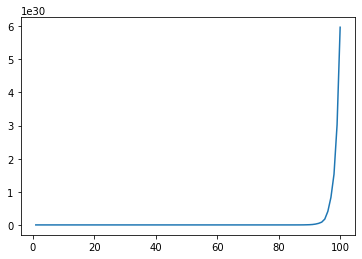

In [18]:
#4.3Dynamic programming 
#又重写了一遍……
#4.1 Dynamic programming 
def Random_integer(N):
    list=[]
    for i in range(N):
        list.append(random.randint(0,10))
    return list
N=int(input('4.1\n请输入一个数'))
print(Random_integer(N))
    
#4.2 Dynamic programming 
#在做第三题的时候运行不出来，所以又重新找了一种方法https://www.geeksforgeeks.org/sum-average-subsets/?ref=gcse
#文中总结了子集平均值求和的公式，使用二项式，C(n, k)
def nCr(n, k):
    C = [[0 for i in range(k + 1)]
            for j in range(n + 1)]
    # 计算二项值的方法
    for i in range(n + 1):
        for j in range(min(i, k) + 1):
            if (j == 0 or j == i):
                C[i][j] = 1 
            else:
                C[i][j] = C[i-1][j-1] + C[i-1][j]  # 基于存储的值计算C[i][j]   
    return C[n][k]
 
# 求所有子集平均值的和
def Sum_averages(arr, m):
    result = 0.0  # 初始化结果
    sum = 0
    for i in range(m):
        sum += arr[i]
 
    # 对元素个数相同的子集进行循环
    for n in range(1, m + 1):
        result += (sum * (nCr(m - 1, n - 1))) / n
    return result
N=int(input('4.2\n请输入一个数'))
arr=Random_integer(N)
m=len(arr)
print('子集平均值和',Sum_averages(arr, m))

#4.3 Dynamic programming 
import matplotlib.pyplot as plt
print('4.3')
Total_sum_averages=[]
for i in range(1,101):
    arr2=Random_integer(i)
    
    Total_sum_averages.append(Sum_averages(arr2, i))
#绘图
row = [i for i in range(1,101)]
plt.plot(row, Total_sum_averages)
plt.show()

In [4]:
#5.1Path counting

import numpy as np
import random
#Create a random matrix with N rows and M columns,M=4,N=4,the elements in matrix with 0 and 1
arr1=np.random.randint(0,2,16).reshape(4,4)
#replace the right-bottom corner and top-left corner cells with 1
arr1[0,0]=1
arr1[-1,-1]=1
print('5.1题：\n',arr1)

#5.2Path counting
#第二版
import numpy as np
import random

N=int(input('5.2题请输入N的值：'))
M=int(input('5.2题请输入M的值：'))
arr2=np.random.randint(0,2,M*N).reshape(N,M)
arr2[0,0]=1
arr2[-1,-1]=1
print(arr2)
#申涵告诉我这种方法，创建一个空的矩阵，来存储路径数，总体是递归的方法
def Count_path(matrix):
    intinal=np.zeros((N,M),dtype = int) #创建一个初始化矩阵，用来存放路径数
    for i in range(0, N):   #在1-N行中，如果有0，就结束循环         
        if matrix[i,0] == 0:
            break
        else:
            intinal[i,0] = matrix[i,0]  #如果这行中元素不等于0，初始化矩阵的元素对应等于矩阵的元素，也就是1
            
    for j in range(0,M):            
        if matrix[0,j] == 0:  #同理，在1-M列中，如果有0，就结束循环 
            break
        else:
            intinal[0,j] = matrix[0,j]  #如果这列中元素不等于0，初始化矩阵的元素对应等于矩阵的元素，也就是1
            
            
    for i in range(1, N):           
        for j in range(1,M):  #从第二行第二列的位置开始
            if matrix[i,j] == 1:
                intinal[i,j] = intinal[i - 1,j] + intinal[i,j - 1]  #如果[i,j]位置是1，对应的初始化矩阵等于上方加左方数值的和
    return intinal[-1,-1]  #返回右下角的值，就是最终路径数

print('路径数为：',Count_path(arr2))

#5.3
res=[] #创建一个空的列表用于之后存放路径数
N=int(input('5.3题请输入N的值：'))
M=int(input('5.3题请输入M的值：'))
for i in range(0,1001):
    arr3=np.random.randint(0,2,M*N).reshape(N,M)
    arr3[0,0]=1
    arr3[-1,-1]=1
    res.append(Count_path(arr3))
    
print(res)
avg=np.average(res)
print('路径数的平均值：',avg)

5.1题：
 [[1 1 1 1]
 [0 1 1 0]
 [1 1 0 1]
 [1 1 1 1]]


5.2题请输入N的值： 3
5.2题请输入M的值： 3


[[1 1 0]
 [1 1 0]
 [0 1 1]]
路径数为： 2


5.3题请输入N的值： 10
5.3题请输入M的值： 8


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 120, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 